In [169]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import generic_Sobol_computation_v2 as genS

In [170]:
parameter_list = genS.get_X_param()

In [ ]:
_,_,lbd_g_test,_ = genS.AIS_CE([np.array([0,0]),np.array([[1,0],[0,1]])],np.array([0.05,0.04]),parameter_list,genS.QoI_threshold,0,10000,0.1,[i for i in range(2)])

In [184]:
#_,_,lbd_g_test,_ = genS.AIS_CE([np.array([0,0]),np.array([[1,0],[0,1]])],np.array([0.29,0.11]),parameter_list,genS.QoI_threshold,0,10000,0.1,[i for i in range(2)])
_,_,lbd_g_test,_ = genS.AIS_CE([np.array([0,0]),np.array([[1,0],[0,1]])],np.array([0.05,0.04]),parameter_list,genS.QoI_threshold,0,10000,0.1,[i for i in range(2)])


[[0, 'parameter 0', 0.1], [1, 'parameter 1', 0.1]]
[[0, 'parameter 0', 0.05], [1, 'parameter 1', 0.04]]
t_m = 0
proportion of new samples in intermediary failure zone: 1.0
current sampling parameters: [array([47.97317024, 66.02291988]), array([[31.8289438 ,  0.        ],
       [ 0.        , 38.25074913]])]
current probability estimation: 1.354993633136109e+147
current cv estimation: 0.9999499987499378
t_m = -91.03126701175384
lbd[0] : [47.97317024 66.02291988]
proportion of new samples in intermediary failure zone: 0.9989
proportion of new samples in failure zone: 0.9817
det: 1217.480944492886
lbd_num : [10530.33148471 16591.25029271], lbd_denom : 242.60894380215655
current sampling parameters: [array([43.40454775, 68.38680402]), array([[ 87.99670218, -33.45290408],
       [-33.45290408,  85.87181832]])]
current probability estimation: 0.013376437938436575
current cv estimation: 0.01176645417228706
threshold reached, t_m = -100
loop ended
 


In [4]:
_,_,lbd_g_test1,_ = genS.AIS_CE([np.array([0,0]),np.array([[1,0],[0,1]])],np.array([0.1929227,0.28777213]),parameter_list,genS.QoI_threshold,0,10000,0.1,[i for i in range(2)])

[[0, 'parameter 0', 0.1], [1, 'parameter 1', 0.1]]
[[0, 'parameter 0', 0.1929227], [1, 'parameter 1', 0.28777213]]
t_m = 0
proportion of new samples in intermediary failure zone: 1.0
current sampling parameters: [array([15.43530592,  6.98287815]), array([[7.02129791, 0.        ],
       [0.        , 5.71350566]])]
current probability estimation: 0.0
current cv estimation: nan
t_m = -18.049723499895418
lbd[0] : [15.43530592  6.98287815]
proportion of new samples in intermediary failure zone: 0.9446
proportion of new samples in failure zone: 0.0
det: 40.116225399410574
lbd_num : [1079.76818339  581.21544077], lbd_denom : 55.496179165004605
current sampling parameters: [array([19.45662205, 10.47307129]), array([[ 7.63234387, -3.66343714],
       [-3.66343714,  9.81411082]])]
current probability estimation: 0.0
current cv estimation: nan
t_m = -28.677774628051438
lbd[0] : [19.45662205 10.47307129]
proportion of new samples in intermediary failure zone: 0.8297
proportion of new samples in f

In [ ]:
draw_g_test = (lambda lbd_t = lbd_g_test : np.random.default_rng().multivariate_normal(mean = lbd_t[0], cov = lbd_t[1]))

In [22]:
g_test = lambda x, lbd_t=lbd_g_test: 1/(2*np.pi*np.linalg.det(lbd_t[1]))*np.exp(-0.5*(np.array([x-lbd_t[0]])@np.linalg.inv(lbd_t[1])@np.array([x-lbd_t[0]]).T)[0,0])

In [9]:
from scipy import stats

In [7]:
stats.multivariate_normal.pdf(lbd_g_test[0],mean = lbd_g_test[0],cov = lbd_g_test[1])

0.012360206533918791

In [38]:
g_test(lbd_g_test[0])

0.0011691567086332677

In [ ]:
2*(2>0)

In [193]:
genS.true_failure_proba(0.05,0.04)

0.07478445001828922

In [196]:
X = [[np.random.default_rng().exponential(scale=1/lbd_new[0]),np.random.default_rng().exponential(scale=1/lbd_new[1])] for _ in range(100000)]

In [197]:
Y =np.array([genS.test_function(*x) for x in X])<genS.QoI_threshold
np.mean(Y)

0.07419

In [129]:
np.min(f_array[f_array>0])

3.890962497854155e-06

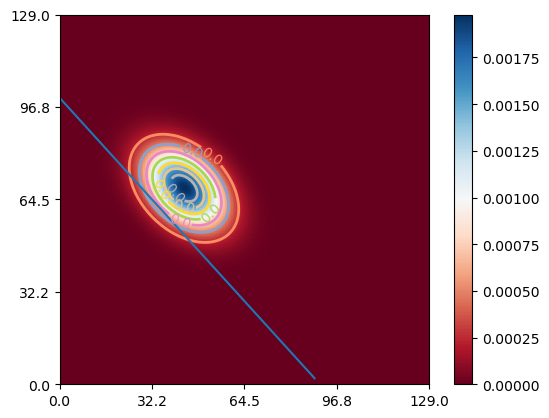

In [185]:
import matplotlib.pylab as plb

def limit_state(x):
    return 100-1.1*x
# the function that I'm going to plot
 
x = np.arange(0,130,1)
y = np.arange(0,130,1)
X,Y = np.meshgrid(x, y) # grid of point
Z = np.array([[stats.multivariate_normal.pdf(np.array([x_i, y_i]),mean = lbd_g_test[0],cov = lbd_g_test[1]) for x_i, y_i in zip(row_x, row_y)] for row_x, row_y in zip(X, Y)])

im = plb.imshow(Z,extent=(x.min(), x.max(), y.min(), y.max()), origin='lower',cmap=plb.cm.RdBu) # drawing the function
# adding the Contour lines with labels
cset = plb.contour(X,Y,Z,linewidths=2,cmap=plb.cm.Set2)
plb.clabel(cset,inline=True,fmt='%1.1f',fontsize=10)
plb.colorbar(im) # adding the colobar on the right
plb.plot(x[:int(100/1.1)],limit_state(x[:int(100/1.1)]))
plb.xticks(np.linspace(x.min(), x.max(), 5))  # Evenly spaced ticks on x-axis
plb.yticks(np.linspace(y.min(), y.max(), 5))  # Evenly spaced ticks on y-axis


# latex fashion title
plb.title('')
plb.show()

In [214]:
[lbd_new[0]*lbd_new[1]*np.exp(-lbd_new[0]*X[i][0]-lbd_new[1]*X[i][1]) for i in range (10000)]

[1.624864194938795e-05,
 1.4707703413450581e-05,
 1.5566615758658495e-05,
 1.3952231790632504e-05,
 1.4469940411269124e-05,
 1.2579829006731053e-05,
 1.5380999944473108e-05,
 1.4412523214835068e-05,
 1.7027219347153232e-05,
 1.4553870899064856e-05,
 1.3947053100145216e-05,
 1.18967867459016e-05,
 1.3301772842663567e-05,
 1.4437141428812494e-05,
 1.1549526074528696e-05,
 1.4460910519117474e-05,
 1.4101024046923408e-05,
 1.381744830886218e-05,
 1.691427022518863e-05,
 1.2356199678005846e-05,
 1.5023554037162489e-05,
 1.4595311337013028e-05,
 1.429966749046802e-05,
 1.0958422053840813e-05,
 1.6112126718337074e-05,
 1.7874183264290857e-05,
 1.3992852865183088e-05,
 1.4370320114762625e-05,
 1.3708505564598601e-05,
 1.3576328075176364e-05,
 2.003886185253458e-05,
 1.4582035119203966e-05,
 1.8676805860991258e-05,
 1.3580086617170449e-05,
 1.4776689236435878e-05,
 1.3214855792343384e-05,
 1.990553182240504e-05,
 2.0149661208877974e-05,
 1.5240711475376072e-05,
 1.287319441922144e-05,
 1.845490

In [215]:
[stats.expon.pdf(X[i][0],scale = 1/lbd_new[0])*stats.expon.pdf(X[i][1],scale = 1/lbd_new[1]) for i in range (10000)]

[1.6248641949387956e-05,
 1.4707703413450576e-05,
 1.5566615758658502e-05,
 1.3952231790632498e-05,
 1.4469940411269115e-05,
 1.2579829006731053e-05,
 1.5380999944473125e-05,
 1.4412523214835068e-05,
 1.7027219347153225e-05,
 1.4553870899064857e-05,
 1.3947053100145224e-05,
 1.189678674590161e-05,
 1.3301772842663564e-05,
 1.443714142881251e-05,
 1.1549526074528697e-05,
 1.4460910519117474e-05,
 1.4101024046923416e-05,
 1.3817448308862188e-05,
 1.691427022518864e-05,
 1.2356199678005838e-05,
 1.5023554037162494e-05,
 1.4595311337013035e-05,
 1.4299667490468027e-05,
 1.0958422053840818e-05,
 1.6112126718337064e-05,
 1.7874183264290864e-05,
 1.3992852865183086e-05,
 1.437032011476263e-05,
 1.3708505564598603e-05,
 1.357632807517637e-05,
 2.0038861852534598e-05,
 1.4582035119203964e-05,
 1.8676805860991258e-05,
 1.3580086617170446e-05,
 1.4776689236435878e-05,
 1.3214855792343389e-05,
 1.9905531822405047e-05,
 2.014966120887796e-05,
 1.5240711475376072e-05,
 1.2873194419221447e-05,
 1.845

In [212]:

lbd_new = np.array([0.05,0.04])
draw_g_test = (lambda lbd_t = lbd_g_test : np.random.default_rng().multivariate_normal(mean = lbd_t[0], cov = lbd_t[1]/10))
X = np.array([draw_g_test() for _ in range(10000)])
fail_times =np.array([genS.test_function(*x) for x in X])
lbd_exp_values = np.exp(-lbd_new[:, np.newaxis] * X.T)
f_array = np.array([stats.expon.pdf(X[i][0],scale = 1/lbd_new[0])*stats.expon.pdf(X[i][1],scale = 1/lbd_new[1]) for i in range (10000)])#np.array([lbd_new[0]*lbd_new[1]*np.exp(-lbd_new[0]*X[i][0]-lbd_new[1]*X[i][1]) for i in range (10000)])#np.prod(lbd_new[:, np.newaxis] * lbd_exp_values, axis=0)*(X[:,0]>0)*(X[:,1]>0)

f_array[fail_times>=genS.QoI_threshold]=0
g_array = [stats.multivariate_normal.pdf(x,mean = lbd_g_test[0],cov = lbd_g_test[1]/10) for x in X]
estimation = np.mean(f_array/g_array)

print(f"estimated proba {estimation}")

estimated proba 0.008690808218476386


In [208]:
lbd_new = np.array([0.05,0.04])
lbd_aux = np.array([0.01,0.02])
draw_g_test0 = lambda lbd_t = lbd_aux : np.random.default_rng().exponential(scale = 1/lbd_t[0])
draw_g_test1 = lambda lbd_t = lbd_aux : np.random.default_rng().exponential(scale = 1/lbd_t[1])
X = np.array([np.array([draw_g_test0(),draw_g_test1()]) for _ in range(1000)])
fail_times =np.array([genS.test_function(*x) for x in X])
lbd_exp_values = np.exp(-lbd_new[:, np.newaxis] * X.T)
f_array = np.array([stats.expon.pdf(X[i][0],scale = 1/lbd_new[0])*stats.expon.pdf(X[i][1],scale = 1/lbd_new[1]) for i in range (1000)])#np.array([lbd_new[0]*lbd_new[1]*np.exp(-lbd_new[0]*X[i][0]-lbd_new[1]*X[i][1]) for i in range (10000)])#np.prod(lbd_new[:, np.newaxis] * lbd_exp_values, axis=0)*(X[:,0]>0)*(X[:,1]>0)

f_array[fail_times>=genS.QoI_threshold]=0
g_array = np.array([stats.expon.pdf(X[i][0],scale = 1/lbd_aux[0])*stats.expon.pdf(X[i][1],scale = 1/lbd_aux[1]) for i in range (1000)])
estimation = np.mean(f_array/g_array)

print(f"estimated proba {estimation}")

estimated proba 0.0760403661333468


In [104]:
f_array

array([2.03331105e-05, 3.01399505e-05, 3.10024972e-05, ...,
       1.52432745e-05, 3.61267125e-05, 1.79739572e-05])

In [95]:
lbd_new = np.array([0.05,0.04])
draw_g_test = (lambda lbd_t = lbd_g_test : np.random.default_rng().multivariate_normal(mean = lbd_t[0], cov = lbd_t[1]))
X,_,fail_times = genS.sample_IS(draw_g_test,parameter_list,10000)
lbd_exp_values = np.exp(-lbd_new[:, np.newaxis] * X.T)
f_array = np.prod(lbd_new[:, np.newaxis] * lbd_exp_values, axis=0)*(X[:,0]>0)*(X[:,1]>0)

f_array[fail_times>=genS.QoI_threshold]=0
g_array = [stats.multivariate_normal.pdf(x,mean = lbd_g_test[0],cov = lbd_g_test[1]) for x in X]
estimation = np.mean(f_array/g_array)

print(f"estimated proba {estimation}")

estimated proba 0.149474196914857


In [ ]:
np.array([g_list[g_index](X[simu_index]) for simu_index in range(1000)])

## Other lbd values

In [5]:
#full_lbd_samples, used_indices_lists_t1,used_indices_lists_t2,used_indices_lists = genS.Sobol_mIS_adaptive([lbd_g_test,lbd_g_test1],[0],parameter_list,genS.QoI_threshold,1000,1000,0.1,0.0)
full_lbd_samples,used_indices_lists = genS.Sobol_mIS_adaptive([lbd_g_test],[0],parameter_list,genS.QoI_threshold,1000,1,0.1,0.0,50)

True probas : [1.98192575e-08 1.64278450e-05]
Sobol estimation with true probabilities: nan

n_IS = 1
g_array_list updated
estimated failure proba: [9.20844298e-11 3.68423064e-06]
relative errors for probability estimations : [0.77573257 0.99535379]
mean relative error : 0.8855431782181846
mean cv : 0.026298366479321912
max cv : 0.02705126136971208
mean ess : 663.3072370986672
min ess : 638.5858497586376
current Sobol index estimation: nan
number of different mixture used: 1
parameter yielding max error : [0.21169618 0.11991905]
[[0, 'parameter 0', 0.1], [1, 'parameter 1', 0.1]]
[[0, 'parameter 0', 0.2116961828995252], [1, 'parameter 1', 0.11991905428297925]]
t_m = 0


d:\jo.mboko\Documents\Code\Stepper_test\generic_Sobol_computation_v2.py:2213: RuntimeWarning: invalid value encountered in scalar divide
  S_true = ((1/M)*np.sum([p_true[i]*p_true[i+M]  for i in range(M)])-(1/M)*np.sum([p_true[i] for i in range(M)])* (1/M)*np.sum([p_true[i+M]  for i in range(M)]))/ ((1/M)*np.sum([p_true[i]**2 for i in range(M)])- ((1/M)*np.sum([p_true[i]  for i in range(M)]))**2)
d:\jo.mboko\Documents\Code\Stepper_test\generic_Sobol_computation_v2.py:2284: RuntimeWarning: invalid value encountered in scalar divide
  S = ((1/M)*np.sum([p_f[i]*p_f[i+M]  for i in range(M)])-(1/M)*np.sum([p_f[i] for i in range(M)])* (1/M)*np.sum([p_f[i+M]  for i in range(M)]))/ ((1/M)*np.sum([p_f[i]**2 for i in range(M)])- ((1/M)*np.sum([p_f[i]  for i in range(M)]))**2)


proportion of new samples in intermediary failure zone: 1.0
current sampling parameters: [array([10.0316057 , 23.81191113]), array([[ 8.06502887,  0.        ],
       [ 0.        , 11.50207221]])]
current probability estimation: 0.0
current cv estimation: nan
t_m = -26.547836467297994
lbd[0] : [10.0316057  23.81191113]
proportion of new samples in intermediary failure zone: 0.9672
proportion of new samples in failure zone: 0.0
det: 92.7645443908297
lbd_num : [ 903.10386754 1874.13633837], lbd_denom : 64.23300733239397
current sampling parameters: [array([14.05980982, 29.17715387]), array([[14.53385468, -9.21677023],
       [-9.21677023, 18.58882942]])]
current probability estimation: 0.0
current cv estimation: nan
t_m = -40.77583136799592
lbd[0] : [14.05980982 29.17715387]
proportion of new samples in intermediary failure zone: 0.8364
proportion of new samples in failure zone: 0.0
det: 185.21849197991804
lbd_num : [ 449.77149315 1231.77528557], lbd_denom : 31.434305343363846
current sa

KeyboardInterrupt: 

In [6]:
used_indices = used_indices_lists

In [7]:
used_indices_set = []
indices_list = []
for index in range(len(used_indices)):
    item = set(used_indices[index])
    new=True
    for i in range(len(used_indices_set)):
        if item==used_indices_set[i]:
            indices_list[i].append(index)
            new = False
    if new:
        used_indices_set.append(set(item))
        indices_list.append([index])


In [ ]:
used_indices_set

In [8]:
lbd_sample = full_lbd_samples

In [9]:
points = np.array([[0.29,0.11],[0.19292278,0.28777213],[0.15491723, 0.10162636],[0.11774382, 0.10379619]])

In [ ]:
list_index = 3
plt.title(f"{used_indices_set[list_index]}")
plt.hist2d(lbd_sample[indices_list[list_index]][:,0],lbd_sample[indices_list[list_index]][:,1],bins=(50,50))
plt.scatter([points[i][0] for i in used_indices_set[list_index]],[points[i][1] for i in used_indices_set[list_index]],c="red")
#plt.hist2d(lbd_sample[indices_list_new[1]][:,0],lbd_sample[indices_list_new[1]][:,0])
#plt.hist2d(lbd_sample[indices_list_new[2]][:,0],dlbd_sample[indices_list_new[2]][:,0])
plt.show()

In [ ]:
plt.title("{0,1}")
plt.hist2d(lbd_sample[indices_list[1]][:,0],lbd_sample[indices_list[1]][:,1],bins=(50,50))
plt.scatter(0.29,0.11,c="red")
plt.show()

In [ ]:
import os
PATH = "D:\jo.mboko\Documents\Code\Stepper_test"
os.chdir(PATH)

In [ ]:
np.save("indices_list_0_0.npy",indices_list[0])
np.save("indices_list_0_01.npy",indices_list[1])
np.save("lbd_sample_0.npy",lbd_sample)

In [ ]:
plt.title("{0,1}")
plt.hist2d(lbd_sample[indices_list[2]][:,0],lbd_sample[indices_list[2]][:,1],bins=(50,50))
plt.scatter([0.10097957,0.29], [0.27464195,0.11],c="red")
plt.show()

In [ ]:
plt.hist2d(lbd_sample[indices_list[3]][:,0],lbd_sample[indices_list[3]][:,1],bins=(50,50))
plt.show()

In [ ]:
plt.hist2d(lbd_sample[indices_list[4]][:,0],lbd_sample[indices_list[4]][:,1],bins=(50,50))
plt.show()

In [ ]:
plt.hist2d(lbd_sample[indices_list[5]][:,0],lbd_sample[indices_list[5]][:,1],bins=(50,50))
plt.show()

In [ ]:
plt.hist2d(lbd_sample[indices_list[6]][:,0],lbd_sample[indices_list[6]][:,1],bins=(50,50))
plt.show()

In [ ]:
len(indices_list[0])

In [ ]:
used_indices

In [ ]:
np.where(used_indices==used_indices,1,0)